In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt, pow

Consider a *father basis* $\phi$ given by
$$
\phi(x) = \sqrt{\frac{1}{2}}
\begin{cases}
1 & \text{if $-1 \leq x < 1$} \\
0 & \text{otherwise.}
\end{cases}
$$

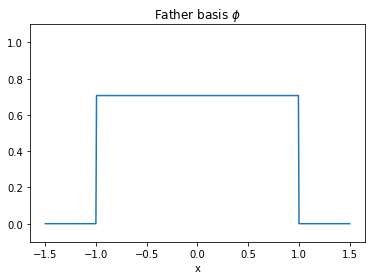

In [2]:
x = np.linspace(-1.5, 1.5, num=500)
phi = np.vectorize(lambda x: 1.0/sqrt(2) if (x >= -1 and x < 1) else 0.0)

plt.title("Father basis $\phi$")
plt.xlabel("x")
plt.ylim(-0.1, 1.1)
plt.plot(x, phi(x))
plt.show()

Note that $\phi$ is normalised since
$$\lVert \phi \rVert^2 = \int_{-1}^{+1} \sqrt{\frac{1}{2}} \cdot \sqrt{\frac{1}{2}} \,\mathrm{d}x = 1 \text{.}$$

The father basis $\phi$ can be expressed as a linear combination of two *scaling functions*.
Following [Haleem et al. 2015](https://doi.org/10.2166/hydro.2015.039), we generate a scaling function $\phi_j^{(n)}$ at refinement level $n=0, \ldots, N$ and position $j=0, \ldots, n-1$,
$$
\phi_j^{(n)} = 2^{n/2} \phi(2^n (x+1) - 2j - 1)
$$

Note that the sole scaling function at refinement level 0, $\phi_0^{(0)}$, is equal to the father basis $\phi$.
At refinement level 1 there are two scaling functions,
$$
\phi_0^{(1)} = \sqrt{2} \phi(2x + 1) =
\begin{cases}1 & \text{if $-1 \leq x < 0$} \\ 0 & \text{otherwise,}\end{cases} \\
\phi_1^{(1)} = \sqrt{2} \phi(2x - 1) =
\begin{cases}1 & \text{if $0 \leq x < 1$} \\ 0 & \text{otherwise.}\end{cases}
$$

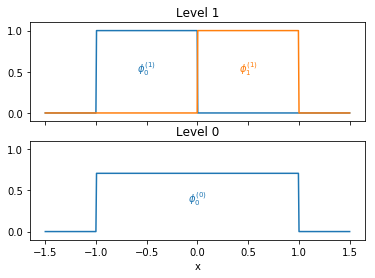

In [10]:
def scaling_function(n, j):
    return np.vectorize(lambda x: pow(2, n/2.0) * phi(pow(2, n) * (x+1) - 2*j - 1))

phi_0_level0 = scaling_function(n=0, j=0)
phi_0_level1 = scaling_function(n=1, j=0)
phi_1_level1 = scaling_function(n=1, j=1)

fig, axes = plt.subplots(2, sharex=True)

axes[1].set_ylim(-0.1, 1.1)
axes[1].set_title("Level 0")
axes[1].text(0, 0.5/sqrt(2), "$\phi_0^{(0)}$", color="C0", horizontalalignment="center")
axes[1].plot(x, phi_0_level0(x))

axes[0].set_title("Level 1")
axes[0].set_ylim(-0.1, 1.1)
axes[0].text(-0.5, 0.5, "$\phi_0^{(1)}$", color="C0", horizontalalignment="center")
axes[0].text(0.5, 0.5, "$\phi_1^{(1)}$", color="C1", horizontalalignment="center")
axes[0].plot(x, phi_0_level1(x))
axes[0].plot(x, phi_1_level1(x))

plt.xlabel("x")
plt.show()

Hence, the father basis can be expressed as the linear combination
$$
\phi = \phi_0^{(0)} = h_0 \phi_0^{(1)} + h_1 \phi_1^{(1)} \text{,}
$$
where the *low-pass filter bank coefficients* $h_0$ and $h_1$ are
$$
h_0 = \langle \phi_0^{(0)}, \phi_0^{(1)} \rangle
= \int_{-1}^0 \frac{1}{\sqrt{2}} \cdot 1\, \mathrm{d}x
= \frac{1}{\sqrt{2}} \text{,} \\
%
h_1 = \langle \phi_0^{(0)}, \phi_1^{(1)} \rangle
= \int_0^1 \frac{1}{\sqrt{2}} \cdot 1\, \mathrm{d}x
= \frac{1}{\sqrt{2}} \text{.}
$$

## Representing details with wavelets

Next, we define a wavelet function $\psi_j^{(n)}$,
$$
\psi_j^{(n)} = 2^{n/2} \psi(2^n (x+1) - 2j - 1)
$$
where $\psi$ is given by
$$
\psi(x) = \frac{1}{\sqrt{2}}
\begin{cases}
-1 & \text{if $-1 \leq x < 0$} \\
1 & \text{if $0 \leq x < 1$} \\
0 & \text{otherwise.}
\end{cases}
$$


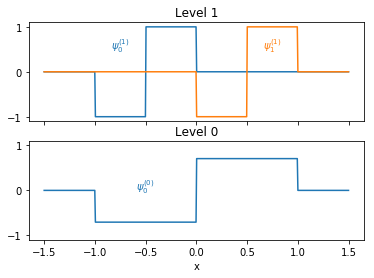

In [11]:
psi = np.vectorize(lambda x: -1.0/sqrt(2) if (x >= -1 and x < 0) else
                              1.0/sqrt(2) if (x >= 0 and x < 1) else 0.0)

def wavelet_function(n, j):
    return np.vectorize(lambda x: pow(2, n/2.0) * psi(pow(2, n) * (x+1) - 2*j - 1))

psi_0_level0 = wavelet_function(n=0, j=0)
psi_0_level1 = wavelet_function(n=1, j=0)
psi_1_level1 = wavelet_function(n=1, j=1)

fig, axes = plt.subplots(2, sharex=True)

axes[1].set_ylim(-1.1, 1.1)
axes[1].set_title("Level 0")
axes[1].text(-0.5, 0, "$\psi_0^{(0)}$", color="C0", horizontalalignment="center")
axes[1].plot(x, psi_0_level0(x))

axes[0].set_title("Level 1")
axes[0].text(-0.75, 0.5, "$\psi_0^{(1)}$", color="C0", horizontalalignment="center")
axes[0].text(0.75, 0.5, "$\psi_1^{(1)}$", color="C1", horizontalalignment="center")
axes[0].plot(x, psi_0_level1(x))
axes[0].plot(x, psi_1_level1(x))

plt.xlabel("x")
plt.show()

The wavelet function $\psi_0^{(0)}$ can be expressed as the linear combination
$$
\psi_0^{(0)} = g_0 \phi_0^{(1)} + g_1 \phi_1^{(1)} \text{,}
$$
where the *high-pass filter bank coefficients* $g_0$ and $g_1$ are
$$
g_0 = \langle \psi_0^{(0)}, \phi_0^{(1)} \rangle = -\frac{1}{\sqrt{2}} \text{,} \\
g_1 = \langle \psi_0^{(0)}, \phi_1^{(1)} \rangle = \frac{1}{\sqrt{2}} \text{.}
$$

## Decoding

Consider a function $f(x)$ that is a linear combination of scaling functions $\phi_0^{(1)}$ and $\phi_1^{(1)}$,
$$
f(x) = s_0^{(1)} \phi_0^{(1)} + s_1^{(1)} \phi_1^{(1)}
$$
where $s_0^{(1)}$ and $s_1^{(1)}$ are the *scale coefficients* at refinement level 1.
The function $f(x)$ can be *decoded* to obtain the scale coefficient $s_0^{(0)}$ and *detail coefficient* $d_0^{(0)}$ at refinement level 0.

We use the low-pass filter bank coefficients to obtain the scale coefficient,
$$
s_0^{(0)} = h_0 s_0^{(1)} + h_1 s_1^{(1)} \text{,}
$$
and we use the high-pass filter bank coefficients to obtain the detail coefficient,
$$
d_0^{(0)} = g_0 s_0^{(1)} + g_1 s_1^{(1)} \text{.}
$$
Now we can express $f(x)$ in its decoded form,
$$
f(x) = s_0^{(0)} \phi_0^{(0)} + d_0^{(0)} \psi_0^{(0)} \text{.}
$$

We can think of $s_0^{(0)}$ as the average of $s_0^{(1)}$ and $s_1^{(1)}$, and $d_0^{(0)}$ as the deviation of $s_0^{(1)}$ and $s_1^{(1)}$ from the average.  For example, consider the function
$$
f(x) = 6 \phi_0^{(1)} + 2 \phi_1^{(1)} \text{.}
$$
We can decode this function to obtain
$$
s_0^{(0)} = \frac{6}{\sqrt{2}} + \frac{2}{\sqrt{2}} = 4 \sqrt{2} \text{,} \\
d_0^{(0)} = -\frac{6}{\sqrt{2}} + \frac{2}{\sqrt{2}} = -2 \sqrt{2} \text{.}
$$

## Encoding

Given a function expressed in its decoded form, we can encode it to retrieve its original form.  Knowing the coefficients $s_0^{(0)}$ and $d_0^{(0)}$ at refinement level 0, we use the filter bank coefficients to retrieve the scaling coefficients at refinement level 1,
$$
s_0^{(1)} = h_0 s_0^{(0)} + g_0 d_0^{(0)} \text{,} \\
s_1^{(1)} = h_1 s_0^{(0)} + g_1 d_0^{(0)} \text{.}
$$
Continuing with our example function,
$$
s_0^{(1)} = \frac{1}{\sqrt{2}} \cdot 4 \sqrt{2} - \frac{1}{\sqrt{2}} \cdot -2 \sqrt{2} = 6 \text{,} \\
s_1^{(1)} = \frac{1}{\sqrt{2}} \cdot 4 \sqrt{2} + \frac{1}{\sqrt{2}} \cdot -2 \sqrt{2} = 2 \text{.}
$$
